In [1]:
%config Completer.use_jedi = False  #for autocomplete to work
%gui qt # require for imagetool 

from iexplot import *

iexcode is not loaded: you will need to specify path and prefix when calling IEXdata


# <font color=blue>Loading data with iexplot

### <font color=blue>Initializing IEXdata and loading the first scan

IEXdata creates a python object which not only holds the loaded data and meta but also contains methods for quick plotting. I must first be initialized 
</font>
<code>
     data = IEXdata(scanNum,path='path_to_data',prefix='prefix_of_mda_scans')
</code>   
<br>
data <font color=blue> is a dictionary of dictionaries of the scans
</font>
<code>    
     data.mda[scanNum] => contains all the data from the scanRecord
     data.mda[scanNum].EA => dictionary of all EA spectra for a single mda scan
     data.mda[scanNum].EA[EAnum] => is a single EA spectra with meta data 
</code>


In [3]:
path =  '/net/s29data/export/data_29idb/2021_2/mda'
prefix = 'ARPES_'
data = IEXdata(1143,path=path,prefix=prefix)

path = /net/s29data/export/data_29idb/2021_2/mda
Loaded mdaAD scanNums: [[1143]]


### <font color=blue>Loading the more data

In [6]:
data.update(1455,1460)

Loaded mdaAD scanNums: [[1455], [1456], [1457], [1458], [1459], [1460]]


### <font color=blue>Loading the more data without reloading data already loaded

In [4]:
data.update(1455,1465,overwrite=False)

Loaded mdaAD scanNums: [[], [], [], [], [], [], [1461], [1462], [1463], [1464], [1465]]


### <font color=blue>Loading the to last scan in progress

In [5]:
data.update(1455,inf,overwrite=False)

Loaded mdaAD scanNums: [[], [], [], [], [], [], [], [], [], [], [], [1466], [1467]]


### <font color=blue>Reloading a scan

In [6]:
data.update(1467)

Loaded mdaAD scanNums: [[1467]]


# <font color=blue>Plotting mda scans

### <font color=blue>Showing the doc string

In [13]:
data.plotmda?

Signature: data.plotmda(scanNum, detNum, **kwargs)
Docstring:
simple plot for an mda scans either 1D or a row/column of a 2D data set
    
**kwargs
    data kwargs:
        1D: detector vs x-positioner (num = 1; default)
            posx_Num => to plot verses a different x-positioner number
            y_detNum => to plot verses a detector

        2D: detector vs positioner1 for both x and y (default)
            posx_Num => to plot verses a different x-positioner number
            posy_Num => to plot verses a different y-positioner number
            x_detNum => x-scale is a detector
            y_detNum => y-scale is a detector


    plotting kwargs:
        Norm2One: True/False to normalize spectra between zero and one (default => False)
        offset: y += offset 
        scale: y *= scale
        offset_x: x += offset_x 
        scale_x: x *= scale_x
        
    for 2D data: plots image by default
        row = index for plotting a single row from a 2D data set
        column 

### <font color=blue>Plotting a single scan (1143): detector (17) vs positioner

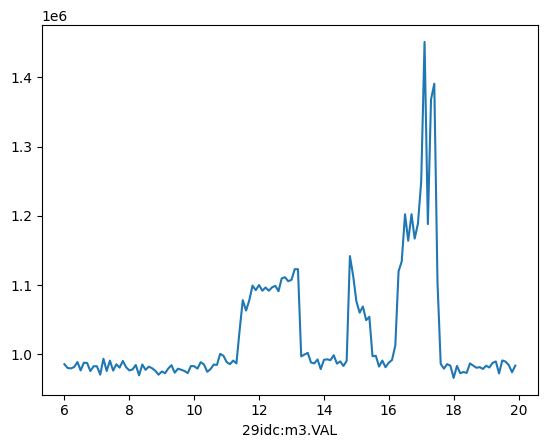

In [4]:
data.plotmda(1143,17)

### <font color=blue>Plotting two detector on the same scan and normalizing to one

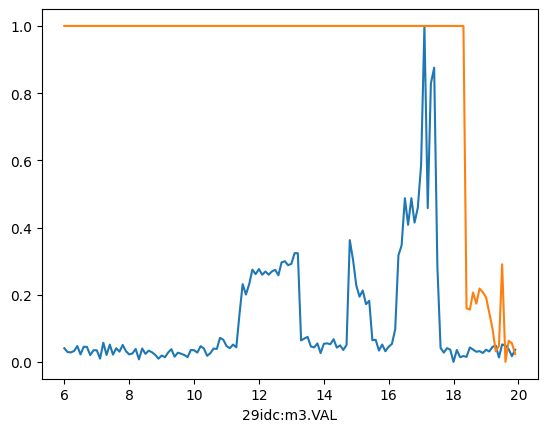

In [10]:
data.plotmda(scanNum,17,Norm2One=True)
data.plotmda(scanNum,16,Norm2One=True)

In [11]:
path='/net/s29data/export/data_29idd/2021_1/Frano/mda/'
prefix='Kappa_'
data.update(1795,path=path,prefix=prefix)

Loaded mdaAD scanNums: [[1795]]


### <font color=blue>Plotting detector vs detector

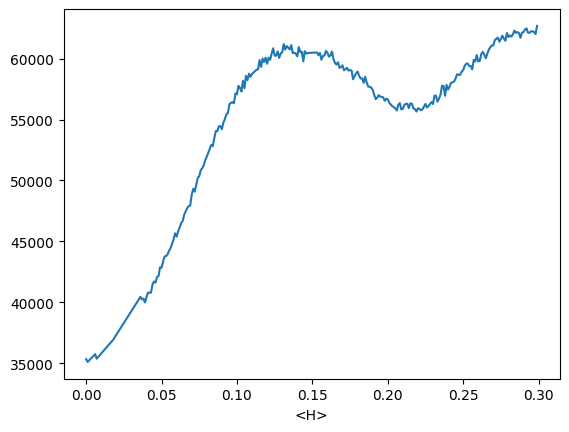

In [14]:
data.plotmda(1795,35, x_detNum=46)

In [10]:
path='/net/s29data/export/data_29idc/2022_2/Comin/mda/'
prefix='ARPES_'
data.update(15,path=path,prefix=prefix)

Loaded mdaAD scanNums: [[15]]


### <font color=blue>Plotting 2D mda scan

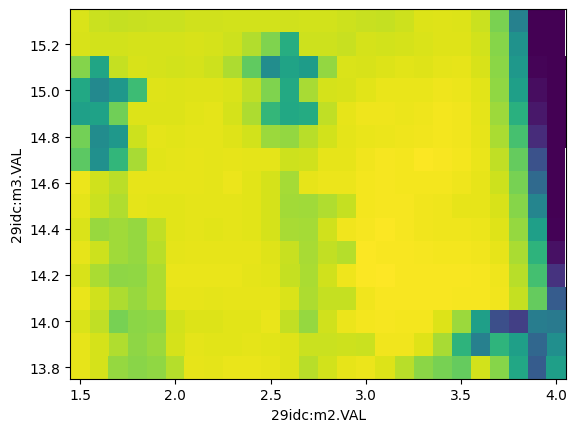

In [14]:
data.plotmda(15,16)

In [2]:
path='/net/s29data/export/data_29idc/2022_1/Checkelsky/mda/'
prefix='ARPES_' #or 'Kappa_ depending if c-branch or d-branch' 

data=IEXdata(273,path=path,prefix=prefix)# initiates a variable "data" and loads scan 273

path = /net/s29data/export/data_29idc/2022_1/Checkelsky/mda/
Loaded mdaAD scanNums: [[273]]


### <font color=blue>Plotting sample map

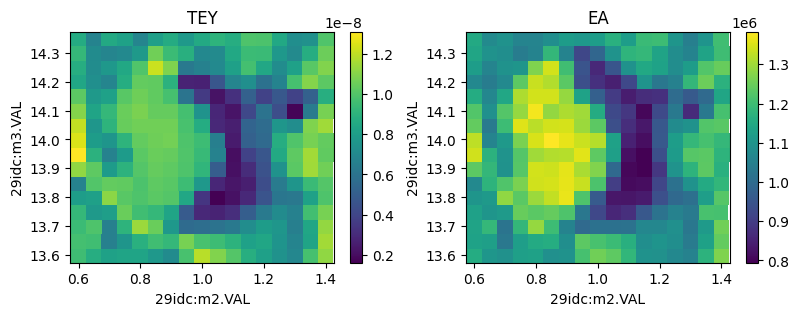

In [8]:
plt.figure(figsize=(40,3))
data.plot_sample_map(273)

In [32]:
path = '/net/s29data/export/data_29idc/2022_1/Khalili/mda/'
prefix = 'ARPES'
data=IEXdata(4,24,path=path,prefix=prefix)

path = /net/s29data/export/data_29idc/2022_1/Khalili/mda/
Loaded mdaAD scanNums: [[4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24]]


### <font color=blue>Using additional kwargs and subplots
<font color=blue>Note: plotEDC and plotmda use the same **kwargs

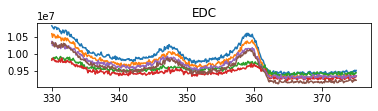

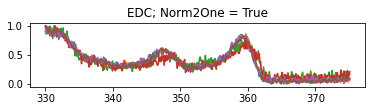

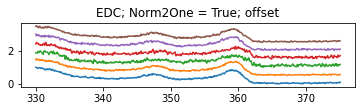

In [41]:
plt.subplot(3, 1, 1)
plt.title('EDC')
for scanNum in [4,16,8,20,12,24]:
    data.plotEDC(scanNum, label=str(scanNum))
plt.show()
    
plt.subplot(3, 1, 2)
plt.title('EDC; Norm2One = True')
for scanNum in [4,16,8,20,12,24]:
    data.plotEDC(scanNum,Norm2One=True, label=str(scanNum))    
plt.show()

plt.subplot(3, 1, 3)
plt.title('EDC; Norm2One = True; offset')
for i, scanNum in enumerate([4,16,8,20,12,24]):
    data.plotEDC(scanNum,Norm2One=True,offset=i*.5, label=str(scanNum))  
    plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# <font color=blue>Plotting EA scans

### <font color=blue>Plotting EA spectra

In [4]:
data.plotEA?

Signature: data.plotEA(scanNum, EAnum=inf, BE=False, transpose=False, **kwargs)
Docstring:
simple plotting for EA spectra

EAnum = scan/sweep number 
        = inf => will sum all spectra

BE = False; Kinetic Energy scaling
BE = True; Binding Energy scaling
   where BE = hv-KE-wk (wk=None uses workfunction defined in the metadata)
    
transpose = False => energy is x-axis
            = True => energy is y-axis

** kwargs: are matplotlib kwargs like pcolormesh, cmap, vmin, vmax
File:      ~/.conda/envs/test/lib/python3.8/site-packages/iexplot/iexplot_EA.py
Type:      method


In [2]:
path='/net/s29data/export/data_29idc/2022_1/Hasan/mda/'
prefix='ARPES_'
data=IEXdata(219,path=path,prefix=prefix)


path = /net/s29data/export/data_29idc/2022_1/Hasan/mda/
Loaded mdaAD scanNums: [[219]]


### <font color=blue>Plotting EA spectra: single sweep

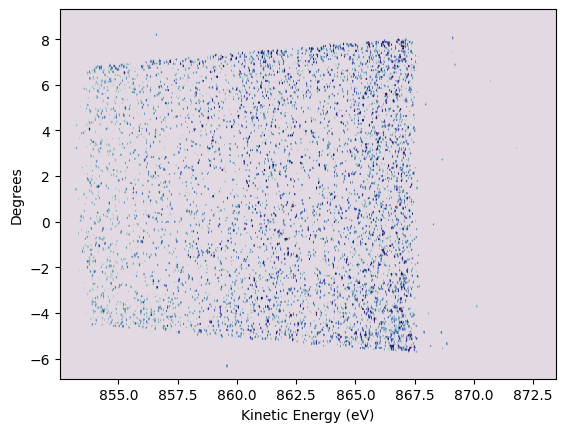

In [11]:
data.plotEA(219,EAnum=1,cmap='twilight')

### <font color=blue>Plotting EA spectra: summed sweeps

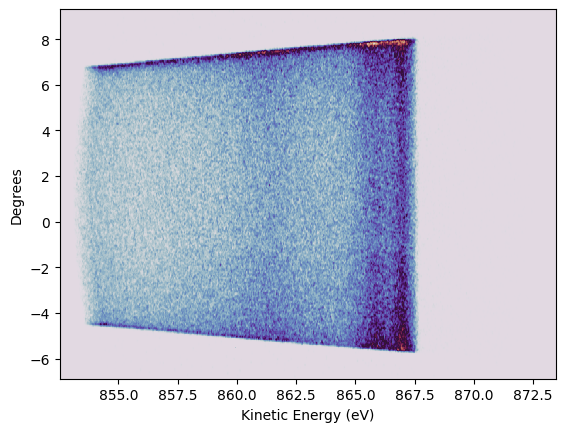

In [12]:
data.plotEA(219,EAnum=inf,cmap='twilight')

### <font color=blue>Plotting EDCs

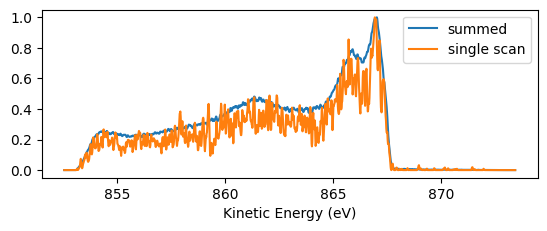

In [8]:
data.plotEDC(219,Norm2One=True,label='summed')
data.plotEDC(219,EAnum=2,Norm2One=True,label='single scan')
plt.legend()

### <font color=blue>Example of unpacking a data for loop and subplots

In [13]:
data=IEXdata(17,29,path='/net/s29data/export/data_29idc/2022_1/Meyers/mda/',prefix='ARPES_')

path = /net/s29data/export/data_29idc/2022_1/Meyers/mda/
Loaded mdaAD scanNums: [[17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29]]


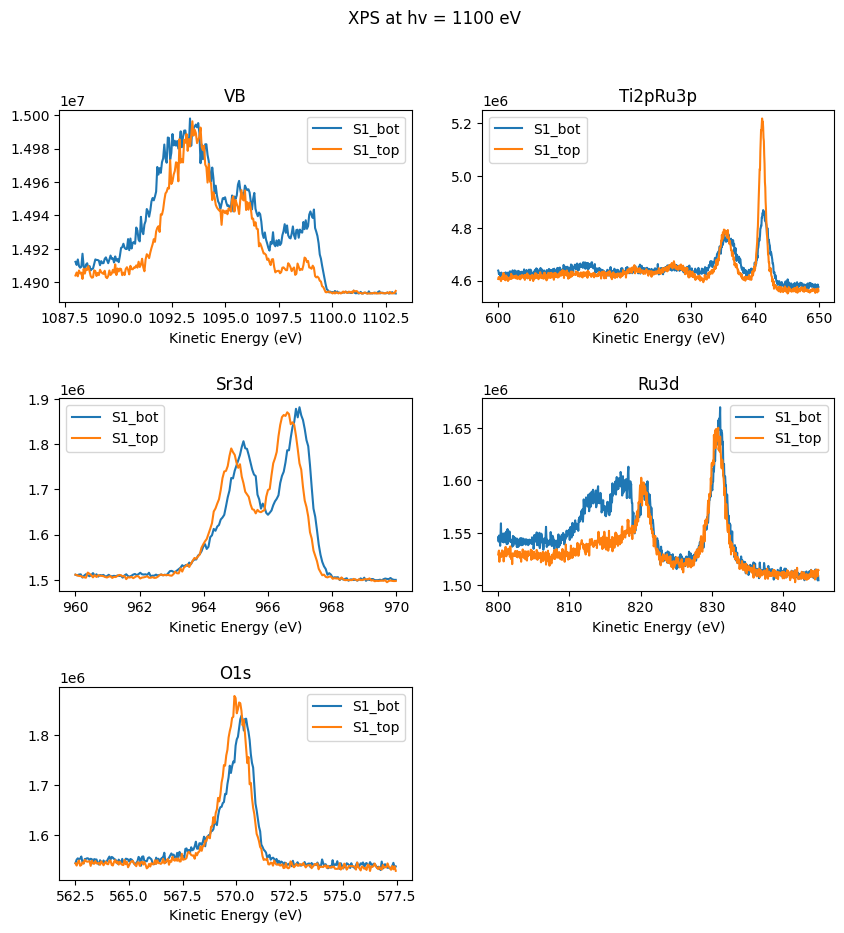

In [14]:
plt.figure(figsize=(10,10))
plt.suptitle('XPS at hv = 1100 eV')
plt.subplots_adjust(hspace=.5)

edgelist = ['VB', 'Ti2pRu3p', 'Sr3d', 'Ru3d', 'O1s']
first_bottom = 17
first_top = 24

for i,edge in enumerate(edgelist):
    plt.subplot(3,2,i+1)
    plt.title(edge)
    data.plotEDC(first_bottom+i,label='S1_bot')
    data.plotEDC(first_top+i,label='S1_top')
    plt.legend()
plt.show()

In [1]:
from iexplot import *
path='/net/s29data/export/data_29idc/2021_2/NXschool/mda/'
prefix='ARPES_'
data=IEXdata(15,path=path,prefix=prefix,crop=True)

iexcode is not loaded: you will need to specify path and prefix when calling IEXdata
path = /net/s29data/export/data_29idc/2021_2/NXschool/mda/
Loaded mdaAD scanNums: [[15]]


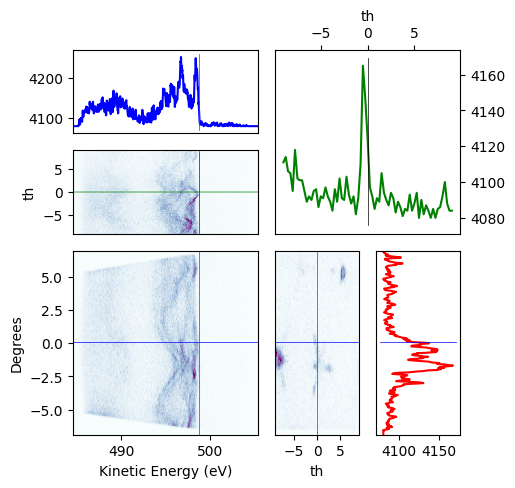

In [6]:
data.plot_stack_mdaEA(15,xCen=498.78,cmap='BuPu')

## Extracting metadata

In [7]:
data.mda[1795].header.all['29idKappa:saveData_comment1']

('', '', '[-0.14435209  1.65957914  0.01084428]', 0, 0)

In [4]:
path='/net/s29data/export/data_29idd/2021_1/Frano/mda/'
prefix='Kappa_'
data=IEXdata(1795,path=path,prefix=prefix)

path = /net/s29data/export/data_29idd/2021_1/Frano/mda/
Loaded mdaAD scanNums: [[1795]]


In [1]:
path='/net/s29data/export/data_29idd/2022_1/Frano/mda/'
prefix='Kappa_'
data=IEXdata(630,path=path,prefix=prefix,dtype='mda')

path = /net/s29data/export/data_29idd/2022_1/Frano/mda/
Loaded mda scanNums: [[630]]


In [2]:
data.mda[630].header.UB

{'29idKappa:UBmatrix': ('UB Matrix',
  '',
  [-0.021753562466657918,
   0.023938570615133405,
   -0.8146171552806547,
   0.8336493008938267,
   0.7959002221544913,
   0.0013601561673931973,
   0.8238282692358381,
   -0.804756208723037,
   -0.022886709665051762]),
 '29idKappa:UBlattice': ('UB Lattice',
  '',
  [5.36, 5.55, 7.71, 90.0, 90.0, 90.0]),
 '29idKappa:UBsample': ('UB Sample', '', 'PNO39'),
 '29idKappa:UBenergy': ('UB Energy', '', [853.6785066000002]),
 '29idKappa:UBlambda': ('UB Lambda', '', [14.523522854410286]),
 '29idKappa:UBor1': ('UB or1',
  '',
  [1.0, 1.0, 0.0, 53.49, 89.33, -0.4, 106.817]),
 '29idKappa:UBor2': ('UB or2',
  '',
  [1.0, 1.0, -1.0, 90.66, 88.725, -0.4, 128.08])}

# <font color=blue>Extacting the data 

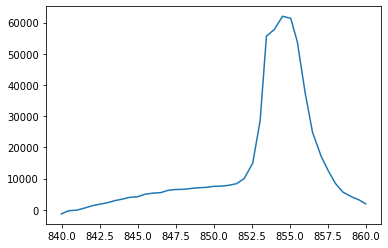

In [14]:
x=data.mdaPos(21)
y=data.mdaDet(21,33)

plt.plot(x,y-np.mean(y[0:5]))
plt.show()

### <font color=blue>Listing all the detectors for a given scan

In [8]:
data.mda[1795].detAll()

1: ('S:SRcurrentAI.VAL', 'SR Current', 'mA')
2: ('EPS:29:ID:SS1:POSITION', 'SS1 Position Text', '')
3: ('29idmono:ENERGY_MON', 'Calculated Photon Energy', 'eV')
4: ('ID29:EnergySet.VAL', 'Set ID energy', 'keV')
5: ('ID29:Energy.VAL', 'ID energy readback', 'keV')
6: ('29idb:ca1:read', '', '')
7: ('29idb:ca2:read', '', '')
8: ('29idb:ca3:read', '', '')
9: ('29idb:ca4:read', '', '')
10: ('29idb:ca5:read', '', '')
11: ('29idb:ca10:read', '', '')
12: ('29idb:ca12:read', '', '')
13: ('29idb:ca13:read', '', '')
14: ('29idb:ca14:read', '', '')
19: ('29idd:ca2:read', '', '')
20: ('29idd:ca3:read', '', '')
21: ('29idd:ca4:read', '', '')
22: ('29idd:ca5:read', '', '')
23: ('29idd:LS331:TC1:SampleA', 'Convt str fror SplA query', '')
24: ('29idd:LS331:TC1:SampleB', 'Convrt str from SplB query', '')
25: ('29id_ps6:Stats1:CentroidX_RBV', '', '')
26: ('29id_ps6:Stats1:SigmaX_RBV', '', '')
27: ('29id_ps6:Stats1:CentroidTotal_RBV', '', '')
30: ('29iddMPA:det1:TotalRate_RBV', '', '')
31: ('29idMZ0:scaler

### <font color=blue>Accessing the metadeta

In [9]:
data.mda[15].header.all

{'sampleEntry': ('description', 'unit string', 'value', 'EPICS_type', 'count'),
 'filename': '/net/s29data/export/data_29idc/2021_2/NXschool/mda/ARPES_0015.mda',
 'version': 1.2999999523162842,
 'scan_number': 15,
 'rank': 2,
 'dimensions': [73, 1],
 'acquired_dimensions': [73, 1],
 'isRegular': 1,
 'ourKeys': ['sampleEntry',
  'filename',
  'version',
  'scan_number',
  'rank',
  'dimensions',
  'acquired_dimensions',
  'isRegular',
  'ourKeys'],
 '29idARPES:saveData_fileName': ('File Name', '', 'ARPES_0015.mda', 0, 0),
 '29idARPES:saveData_fileSystem': ('File System',
  '',
  '/net/s29data/export/data_29idc/2021_2',
  0,
  0),
 '29idARPES:saveData_subDir': ('Subdirectory', '', '/NXschool/mda', 0, 0),
 '29idARPES:saveData_comment1': ('', '', '', 0, 0),
 '29idARPES:saveData_comment2': ('', '', '', 0, 0),
 '29idARPES:saveData_scanNumber': ('Next Scan Number', '', [16], 33, 1),
 'S:SRcurrentAI.VAL': ('SR Current', 'mA', [101.77483681909132], 34, 1),
 'ID29:EnergyRBV.VAL': ('Create a Ener

In [12]:
data.mda[15].header.ID

{'ID29:EnergyRBV.VAL': ('Create a Energy RBV in eV',
  'eV',
  [505.4367184638977]),
 'ID29:Energy.VAL': ('ID energy readback', 'keV', [0.5054367184638977]),
 'ID29:EnergyScanSeteV.VAL': ('Set ID Scan Energy in eV',
  'eV',
  [512.8009999999999]),
 'ID29:EnergySet.VAL': ('Set ID energy', 'keV', [0.512801]),
 'ID29:ActualMode': ('', '', 'CW,  RCP'),
 'ID29:QuasiRatio.RVAL': ('Quasi Periodicity Ratio', '', [100])}